<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

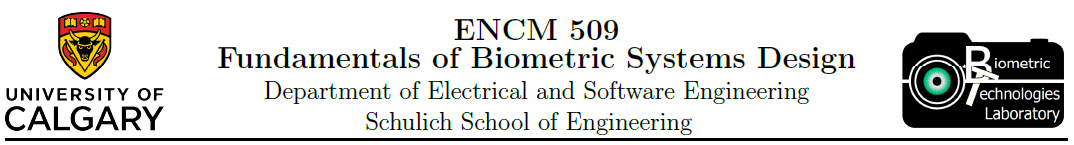

<center>
    <h1>Final Project</h1>
    <h2>Facial Detection</h2>
</center>

Aidan Johnson (30043501)

Cameron Faith (30025734)

March 17th, 2022

In [1]:
import sys
import cv2
import dlib
import skimage
import csv
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches

## Introduction

In this lab, we will be investigating Bayesian Networks and how they provide methods for decision-making in terms of probability based on dependencies. To complete this, we will be utilizing the theory learned in class through manual calcualtions and then comparing those results with the results calculated through using Pyagrum. 

Throughout this lab, we will go through examples covering Bayes rules, joint probability, and finally the importance of having complete CPTs.

### **Common Functions**

In [2]:
"""
Takes in an image path and coverts the image to grayscale.

"""
def convertImageToGrayScale(imPath=None):
    if imPath is None:
        print("No image path was passed!")
        return
    
    image = cv2.imread(imPath)
    grayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayScaleImage

"""
Plots an image in grayscale.

"""
def viewImage(im=None):
    if im is None:
        print("No image was passed!")
        return

    #image = plt.imread(im)
    plt.imshow(im,cmap='gray', vmin=0, vmax=255)
    plt.show()
    return

"""
Performs the Haars cascade facial detection. Different parameters can be passed in to 
change the performance of the haars facial detection algorithm. Returns all the different
faces detected.
"""
def haarsFaceDetect(faceCascade, grayImage, minSize, scaleFactor=1.1, minNeighbors=5):
    faces = faceCascade.detectMultiScale(
                                            grayImage,
                                            scaleFactor=scaleFactor,
                                            minNeighbors=minNeighbors,
                                            minSize=minSize,
                                            flags=cv2.CASCADE_SCALE_IMAGE
                                        )
    return faces

"""
Performs the LBP-based Haars cascade for frontal facial detection using OpenCV. Different parameters can be passed in to change the performance of the haars facial detection algorithm. Returns all the different faces detected. 
"""
def lbpHaarsFaceDetectCV(grayImage, minSize, scaleFactor=1.1, minNeighbors=5):
    # Load LBP cascade classifier training
    lbpFaceCascade = cv2.CascadeClassifier('lbpcascade_frontalface_improved.xml')
    faces = lbpFaceCascade.detectMultiScale(
                                            grayImage,
                                            scaleFactor=scaleFactor,
                                            minNeighbors=minNeighbors,
                                            minSize=minSize,
                                            flags=cv2.CASCADE_SCALE_IMAGE
                                        )
    return faces

"""
Performs the LBP-based Haars cascade for frontal facial detection using Skimage. Different parameters can be passed in to change the performance of the haars facial detection algorithm. Returns all the different faces detected. 

Output Dicts have form {'r': int, 'c': int, 'width': int, 'height': int}, where 'r' represents row position of top left corner of detected window, 'c' - col position, 'width' - width of detected window, 'height' - height of detected window.
"""
def lbpHaarsFaceDetectSki(grayImage, min_size, max_size, scale_factor=1.1, step_ratio=1.1 ):
    # Load LBP cascade classifier training
    lbpFaceCascade = skimage.feature.Cascade('lbpcascade_frontalface_improved.xml')
    faces = lbpFaceCascade.detect_multi_scale(
                                            grayImage,
                                            scale_factor=scale_factor,
                                            step_ratio=step_ratio,
                                            min_size=min_size,
                                            max_size=max_size,
                                        )
    return faces 


"""
Calculates the interzection over union between the ground truth box of an image and the
predicted box for face detection.

"""
def calcIntersectiontionOverUnion(groundTruthBox, predictedBox):
    print(groundTruthBox)
    print(predictedBox)
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(groundTruthBox[0], predictedBox[0])
    yA = max(groundTruthBox[1], predictedBox[1])
    xB = min(groundTruthBox[2], predictedBox[2])
    yB = min(groundTruthBox[3], predictedBox[3])
    print(f"xA = {xA}, yA = {yA}, xB = {xB}, yB = {yB}")

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA+1) * max(0, yB - yA+1)
    print(f"The inter Area is {interArea}")

    # compute the area of both the prediction and ground-truth
    # rectangles
    groundTruthBoxArea = (groundTruthBox[2] - groundTruthBox[0] + 1) * (groundTruthBox[3] - groundTruthBox[1] + 1)
    print(f"Ground truth area is {groundTruthBoxArea}")
    predictedBoxArea = (predictedBox[2] - predictedBox[0] + 1) * (predictedBox[3] - predictedBox[1] + 1)
    print(f"Predicted area is {predictedBoxArea}")
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(groundTruthBoxArea + predictedBoxArea - interArea)
    # return the intersection over union value
    return iou

# Conclusion
In conclusion, this lab illustrates concepts of the Bayesian network and in this lab we were able to explore its various properties including Bayes rule, joint probabilities, and finally the importance of a complete CPT. Throughout the lab, we challenged the theory learned in class by completing the exercise probability calculations manually first and then comparing them with the probabilities calculated by the PyAgrum library. 

As seen from examples 1 and 2, PyAgrum's calculation's aligned with the expected values calculated by hand and shows the library's usefulness in machine reasoning to accurately calculate different probabilities. In example, 3 and 4, we evaluated the importance of a complete CPT and why it is necessary to define all entries in the network.